In [129]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

def safelog(x):
    return (np.log(x + 1e-100))

In [130]:
data_set = np.genfromtxt("images.csv", delimiter = ",")
labels = np.genfromtxt("labels.csv").astype(int)

In [131]:
x_train = data_set[:500]
x_test = data_set[500:]

y_train = labels[:500]
y_test = labels[500:]

In [132]:
eta = 0.0001
epsilon = 1e-3
max_iteration = 500

In [133]:
K = np.max(y_train)
N = x_train.shape[0]

In [134]:
zeros = np.zeros((N,K)).astype(int)
zeros[range(N),(y_train-1)] = 1
y_train = zeros

In [135]:
zeros = np.zeros((N,K)).astype(int)
zeros[range(N),(y_test-1)] = 1
y_test = zeros

In [144]:
def sigmoid(X, w, w0):
    return(1 / (1 + np.exp(-(np.matmul(X, w) + w0))))

In [145]:
def gradient_W(X, Y_truth, Y_predicted):
    return(np.asarray([-np.sum(np.repeat((Y_truth[:,c] - Y_predicted[:,c]).reshape(-1,1), X.shape[1], axis = 1) * X, axis = 0) for c in range(K)]).transpose())

def gradient_w0(Y_truth, Y_predicted):
    return(-np.sum(Y_truth*(1 - y_predicted), axis = 0))

In [146]:
W = np.genfromtxt("initial_W.csv", delimiter = ",")
w0 = np.genfromtxt("initial_w0.csv", delimiter = ",")

In [147]:
iteration = 1
objective_values = []
while 1:
    y_predicted = sigmoid(x_train, W, w0)
    objective_values = np.append(objective_values, -np.sum(y_train * safelog(y_predicted)))
    
    W_old = W
    w0_old = w0

    W = W - eta * gradient_W(x_train, y_train, y_predicted)
    w0 = w0 - eta * gradient_w0(y_train, y_predicted)

    if np.sqrt(np.sum((w0 - w0_old)**2) + np.sum((W - W_old)**2)) < epsilon or iteration >= max_iteration:
        break

    iteration = iteration + 1

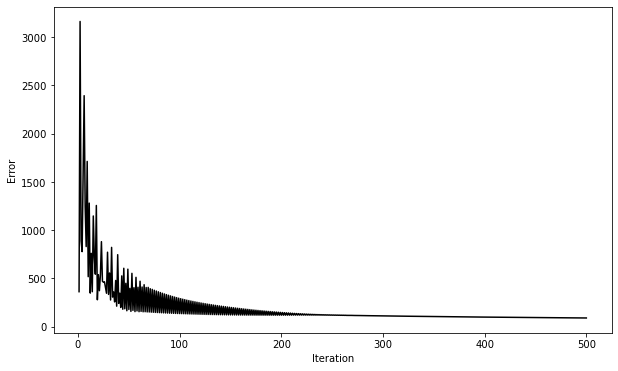

In [148]:
# plot objective function during iterations
plt.figure(figsize = (10, 6))
plt.plot(range(1, iteration + 1), objective_values, "k-")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

In [149]:
train_prediction_classes = np.argmax(y_predicted, axis = 1) + 1
print(pd.crosstab(train_prediction_classes, np.argmax(y_train, axis = 1),rownames = ['y_pred'], colnames = ['y_train']))

y_train    0   1    2    3   4
y_pred                        
1        100   2    6    0   0
2          0  81    0    0   0
3          7   3  106    0   1
4          0   0    0  100   0
5          0   0    0    0  94


In [150]:
test_prediction = sigmoid(x_test, W, w0)

In [151]:
test_prediction_classes = np.argmax(test_prediction, axis = 1) + 1
print(pd.crosstab(test_prediction_classes, np.argmax(y_test, axis = 1),rownames = ['y_pred'], colnames = ['y_test']))

y_test   0   1   2    3   4
y_pred                     
1       82   1   4    0   2
2        0  87   0    0   0
3       14   3  99    0   3
4        0   0   0  103   1
5        3   0   2    0  96
